In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp 

## Read the original data

In [3]:
path="BIA-660 Project Data Subset.csv"
df_temp=pd.read_csv(path)
#delete the last row since the only one data on Nov makes confusion
df=df_temp.drop(df_temp.index[len(df_temp)-1])
df.head()

,user_name,user_product,helpful,funny,post_date,recommend_or_not,game_time,review
0,facciola007,304,4,0,2016/09/15,Recommended,235.2,amaze happy seem good far alpha release pre da...
1,Dixie Normous,257,2,0,2016/09/15,Recommended,156.3,enjoy i've play far graphically look great bar...
2,InquisitorTea,364,31,1,2016/09/15,Recommended,8.5,run well early access original sin good every ...
3,Longmire,115,2,0,2016/09/15,Recommended,16.6,play hour far seem like great road far multipl...
4,Fanest,0,6,2,2016/09/15,Recommended,212.8,play arena pvp tell source point op option pla...


In [4]:
num_total=len(df)
# date form transmission
for i in range(num_total):
    w=df["post_date"][i].split('/')
    q='-'.join(w)
    df.loc[i,"post_date"]= q
df.head()

,user_name,user_product,helpful,funny,post_date,recommend_or_not,game_time,review
0,facciola007,304,4,0,2016-09-15,Recommended,235.2,amaze happy seem good far alpha release pre da...
1,Dixie Normous,257,2,0,2016-09-15,Recommended,156.3,enjoy i've play far graphically look great bar...
2,InquisitorTea,364,31,1,2016-09-15,Recommended,8.5,run well early access original sin good every ...
3,Longmire,115,2,0,2016-09-15,Recommended,16.6,play hour far seem like great road far multipl...
4,Fanest,0,6,2,2016-09-15,Recommended,212.8,play arena pvp tell source point op option pla...


## Data analysis per day (2016-09-15 ~ 2018-8-31)

#### using prophet

In [5]:
dic ={}
for i in range(num_total):
    date = df.iloc[i]["post_date"]
    if date not in dic:
        dic[date] =1
    else:
        dic[date]+=1
print(len(dic))

679


In [6]:
ds=[]
y=[]
for name in dic.keys():
    ds.append(name)
for num in dic.values():
    y.append(num)

In [7]:
df_daily_all = pd.DataFrame() 
df_daily_all["ds"] = ds
df_daily_all["y"] = y
df_daily = df_daily_all.drop(df_daily_all.index[620:]) # known
df_daily_actual = df_daily_all.drop(df_daily_all.index[:620]) # need prediction
df_daily_official = df_daily_all.iloc[284:620] # after release date, before Oct 2018
df_daily_official_all = df_daily_all.iloc[284:] # after release date
len(df_daily_official)

336

In [55]:
df_daily.head()

,ds,y
0,2016-09-15,40
1,2016-09-16,28
2,2016-09-17,17
3,2016-09-18,17
4,2016-09-19,16


In [8]:
len(df_daily_actual)

59

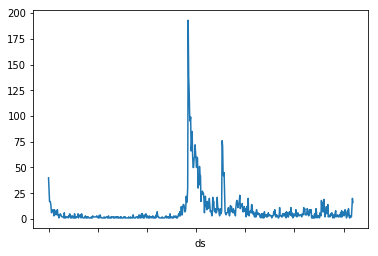

In [9]:
df_daily.set_index('ds').y.plot()

In [10]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_daily)
future = model.make_future_dataframe(periods=61, freq = 'd')
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
K:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
676,2018-10-27
677,2018-10-28
678,2018-10-29
679,2018-10-30
680,2018-10-31


In [11]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
676,2018-10-27,1.847070,0.231293,3.516276,-14.806653,19.670298,-0.068976,-0.068976,-0.068976,0.0,0.0,0.0,-0.068976,-0.068976,-0.068976,1.778094
677,2018-10-28,1.828208,0.160671,3.568966,-16.995876,21.270232,0.400158,0.400158,0.400158,0.0,0.0,0.0,0.400158,0.400158,0.400158,2.228366
678,2018-10-29,1.809345,0.092744,3.600122,-17.509398,18.643658,-0.594260,-0.594260,-0.594260,0.0,0.0,0.0,-0.594260,-0.594260,-0.594260,1.215085
679,2018-10-30,1.790483,0.010812,3.628036,-18.675535,19.204808,-1.198027,-1.198027,-1.198027,0.0,0.0,0.0,-1.198027,-1.198027,-1.198027,0.592456
680,2018-10-31,1.771620,-0.038653,3.670040,-17.861823,19.684133,-0.490523,-0.490523,-0.490523,0.0,0.0,0.0,-0.490523,-0.490523,-0.490523,1.281098


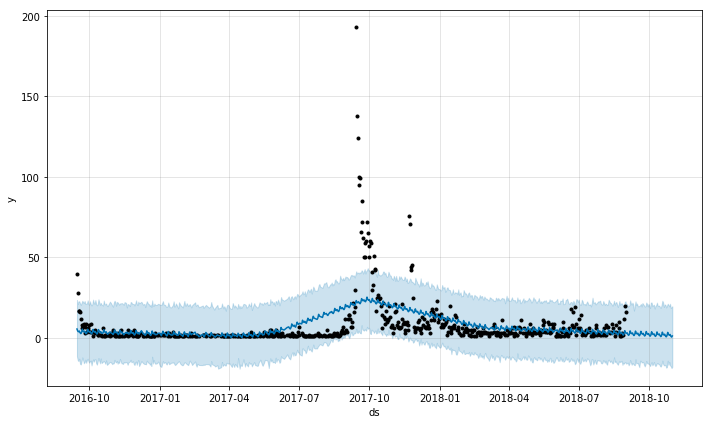

In [12]:
model.plot(forecast);

In [13]:
model2 = Prophet()
model2.fit(df_daily_official)
future2 = model2.make_future_dataframe(periods=61, freq = 'd')
future2.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
392,2018-10-27
393,2018-10-28
394,2018-10-29
395,2018-10-30
396,2018-10-31


In [14]:
forecast2 = model2.predict(future2)
forecast2.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-09-14,91.510599,91.510599,91.510599,81.106089,107.866684,2.308061,2.308061,2.308061,0.0,0.0,0.0,2.308061,2.308061,2.308061,93.818660
1,2017-09-15,89.517397,89.517397,89.517397,75.988997,102.689786,0.399488,0.399488,0.399488,0.0,0.0,0.0,0.399488,0.399488,0.399488,89.916886
2,2017-09-16,87.524196,87.524196,87.524196,75.444152,99.631395,-0.114585,-0.114585,-0.114585,0.0,0.0,0.0,-0.114585,-0.114585,-0.114585,87.409611
3,2017-09-17,85.530994,85.530994,85.530994,74.123834,98.353564,0.544328,0.544328,0.544328,0.0,0.0,0.0,0.544328,0.544328,0.544328,86.075322
4,2017-09-18,83.537792,83.537792,83.537792,68.904490,96.118781,-1.024801,-1.024801,-1.024801,0.0,0.0,0.0,-1.024801,-1.024801,-1.024801,82.512991


In [15]:
len(forecast2)

397

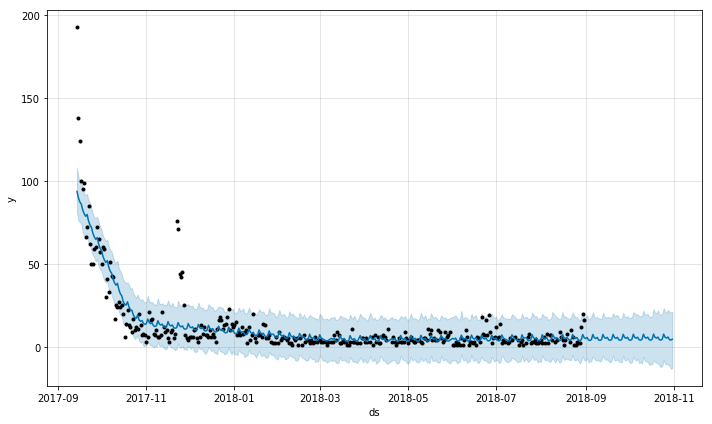

In [16]:
model2.plot(forecast2);

In [17]:
df_daily_official_all.set_index('ds', inplace=True)
forecast2.set_index('ds', inplace=True)
viz_df2 = df_daily_official_all.join(forecast2[['yhat', 'yhat_lower','yhat_upper']], how = 'outer').fillna(0)

In [18]:
viz_df2.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2017-09-14,193.0,93.818660,81.106089,107.866684
2017-09-15,138.0,89.916886,75.988997,102.689786
2017-09-16,124.0,87.409611,75.444152,99.631395
2017-09-17,100.0,86.075322,74.123834,98.353564
2017-09-18,95.0,82.512991,68.904490,96.118781


In [19]:
def dist(dataframe):
    dist=[]
    length=len(dataframe)
    for i in range(length):
        temp=abs((abs(dataframe['yhat'][i])-abs(dataframe['y'][i])))
        dist.append(temp)
    return dist

In [20]:
distance = dist(viz_df2)
score = sum(distance)/len(viz_df2)
print("similarity score is : \n")
print(score)

similarity score is : 

4.87978148756082


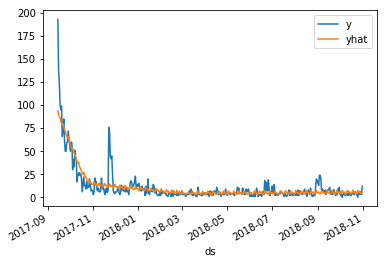

In [21]:
viz_df2[['y', 'yhat']].plot()

#### using polynomial curve fitting

In [22]:
y_temp=[]
x = np.arange(0,len(df_daily),1)
for i in range(len(df_daily)):
    y_temp.append(df_daily["y"][i])
y = np.array(y_temp)
def gaussian(x,*param):  
    return param[0]*np.exp(-np.power(x - param[2], 2.) / (2 * np.power(param[4], 2.)))+param[1]*np.exp(-np.power(x - param[3], 2.) / (2 * np.power(param[5], 2.)))  
popt,pcov = curve_fit(gaussian,x,y)  
print (popt)  
print (pcov)  
   
plt.plot(x,y,'b+:',label='data')  
plt.plot(x,gaussian(x,*popt),'ro:',label='fit')  
plt.legend()  
plt.show()

ValueError: Unable to determine number of fit parameters.

           4             3           2
1.013e-07 x - 7.838e-05 x + 0.02111 x - 2.313 x + 91.53


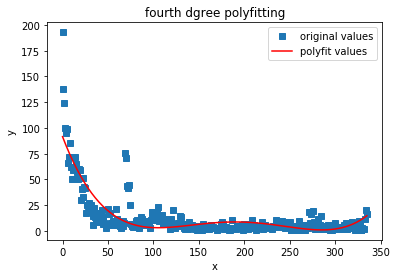

In [47]:
y_temp=[]
x = np.arange(0,len(df_daily_official),1)
for i in range(len(df_daily_official)):
    y_temp.append(df_daily_official["y"][i+284])
y = np.array(y_temp)
z1 = np.polyfit(x, y, 4)#用2次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals = p1(x)  #拟合y值

plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1) 
plt.title('fourth dgree polyfitting')
plt.show()

In [43]:
dist_poly = []
x_poly = np.arange(0,len(df_daily_official_all),1)
y_poly = [(1.013e-07 *x*x*x*x - 7.838e-05 *x*x*x + 0.02111 *x -2.313*x +91.53) for x in x_poly] 
for i in range(len(df_daily_official_all)):
    temp=abs(y_poly[i]-df_daily_all["y"][i])
    dist_poly.append(temp)
score_poly = sum(dist_poly)/len(df_daily_all)
print("similarity score is : \n")
print(score_poly)

similarity score is : 

633.6919570820027


#### third dgree polynomial

            3            2
-1.054e-05 x + 0.006519 x - 1.23 x + 73.64


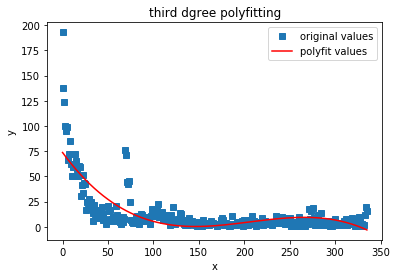

In [48]:
y_temp=[]
x = np.arange(0,len(df_daily_official),1)
for i in range(len(df_daily_official)):
    y_temp.append(df_daily_official["y"][i+284])
y = np.array(y_temp)
z1 = np.polyfit(x, y, 3)#用2次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals = p1(x)  #拟合y值

plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1) 
plt.title('third dgree polyfitting')
plt.show()

In [45]:
dist_poly = []
x_poly = np.arange(0,len(df_daily_official_all),1)
y_poly = [(-1.054e-05 *x*x*x - 0.006519 *x*x + 1.23 *x +73.64) for x in x_poly] 
for i in range(len(df_daily_official_all)):
    temp=abs(y_poly[i]-df_daily_all["y"][i])
    dist_poly.append(temp)
score_poly = sum(dist_poly)/len(df_daily_all)
print("similarity score is : \n")
print(score_poly)

similarity score is : 

163.62900364951395


#### exponential curve fitting

parameter a: 12.30452657404054
parameter b: 2.869100023130686


Text(0.5,1,'curve_fit')

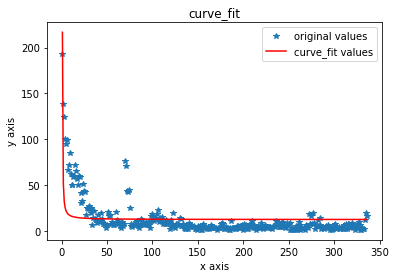

In [106]:
x = np.arange(1,len(df_daily_official)+1,1)
y = np.array(y_temp)
def func(x,a,b):
    return a*np.exp(b/x)
popt, pcov = curve_fit(func, x, y)
a=popt[0]
b=popt[1]
yvals=func(x,a,b)
print (u'parameter a:', a)
print (u'parameter b:', b)
plot1=plt.plot(x, y, '*',label='original values')
plot2=plt.plot(x, yvals, 'r',label='curve_fit values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=1)
plt.title('curve_fit')

In [46]:
dist_exp = []
x_exp = np.arange(1,len(df_daily_official_all)+1,1)
y_exp = [12.30452657404054*np.exp(2.869100023130686/x) for x in x_exp] 
for i in range(len(df_daily_official_all)):
    temp=abs(y_exp[i]-df_daily_all["y"][i])
    dist_exp.append(temp)
score_exp = sum(dist_exp)/len(df_daily_all)
print("similarity score is : \n")
print(score_exp)

similarity score is : 

7.792709825757792


## Data Analysis per month (2016-9 ~2018-8)

In [49]:
ym=['2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09',\
   '2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08',\
   '2018-09','2018-10']

In [50]:
df['ym']=0
for i in range(num_total):
    df.loc[i,"ym"]= df["post_date"][i][0:7]

In [51]:
df_time=[]
df_time_pos=[]
df_time_neg=[]
num_reviews=[]
num_reviews_pos=[]
num_reviews_neg=[]
for a in ym:
    # store the dataframe every month into a list. df_time[0] means the dataframe on 15/09/2016
    df_time.append(df[df["ym"]==a])
    df_time_pos.append(df[(df["ym"]==a) & (df["recommend_or_not"]=="Recommended")])
    df_time_neg.append(df[(df["ym"]==a) & (df["recommend_or_not"]=="Not Recommended")])
time_interval=len(df_time)
for i in range(time_interval):
    num_reviews.append(len(df_time[i]))
    num_reviews_pos.append(len(df_time_pos[i]))
    num_reviews_neg.append(len(df_time_neg[i]))

In [52]:
# positive / total
num_pro=[]
for i in range(len(num_reviews)):
    if num_reviews[i]==0:
        num_pro.append(0)
    else:
        num_pro.append(num_reviews_pos[i]/num_reviews[i]*100)

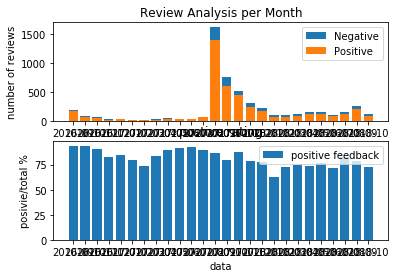

In [53]:
plt.subplot(211) 
width=1.5
s1=plt.bar(ym, num_reviews, label='Negative')
#a=plt.bar(ym, num_reviews_pos)
s2=plt.bar(ym, num_reviews_pos, label='Positive')
plt.title("Review Analysis per Month")
plt.ylabel('number of reviews')
plt.xlabel('data')
plt.legend()
#a.legend('positive')
#expand
#plt.figure(figsize = (100,20))
#plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],ym, rotation=90) #rotate

#plt.savefig("examples.jpg")

plt.subplot(212) 
s3=plt.bar(ym, num_pro, label='positive feedback')
plt.title("postive rating")
plt.ylabel('posivie/total %')
plt.xlabel('data')
plt.legend()
#for a,b in zip(x,y):
#    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

In [54]:
print("Average of positive rating: \n")
ave_num = sum(num_pro)/len(num_pro)
print(ave_num)

Average of positive rating: 

81.69031102811851
